In [39]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

In [2]:
import matplotlib.pyplot as plt

In [3]:
dfad= pd.read_csv (r"C:\Users\MiCachi\Documents\skils-pyt\ia\alz\oasis_longitudinal.csv")

In [4]:
dfad.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [5]:
dfad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


Variables
Subject.ID : Identificador de pacientes.

MRI.ID: Identificador de resonancia magnética de cada paciente.

Group (Converted / Demented / Nondemented) : Clasificación de pacientes al inicio del estudio.

Visit : Numero de visitas.

MR.Delay : No cuenta con descripción.

M.F : Genero.

Age : Edad del paciente.

EDUC : Años de educación.

SES : Estado socioeconómico evaluado por el Índice de posición social de Hollingshead y clasificado en categorías de 1 (estado más alto) a 5 (estado más bajo).

MMSE : Cuestionario de 30 puntos que se usa ampliamente en entornos clínicos y de investigación para medir el deterioro cognitivo. Cualquier puntaje mayor o igual a 24 puntos (de 30) indica una cognición normal. Debajo de esto, los puntajes pueden indicar un deterioro cognitivo grave (≤9 puntos), moderado (10-18 puntos) o leve (19-23 puntos). Es posible que también deba corregirse el puntaje bruto para el nivel educativo y la edad.

CDR : Escala de 5 puntos utilizada para caracterizar seis dominios de rendimiento cognitivo y funcional aplicables a la enfermedad de Alzheimer y las demencias relacionadas: memoria, orientación, juicio y resolución de problemas, asuntos comunitarios, hogar y pasatiempos y cuidado personal. Este puntaje es útil para caracterizar y rastrear el nivel de discapacidad / demencia de un paciente.

eTIV : Volumen intracraneal total estimado en mm3.

nWBV : Volumen normalizado de todo el cerebro, expresado como un porcentaje de todos los vóxeles en la imagen enmascarada de atlas que el proceso automatizado de segmentación de tejidos etiqueta como materia gris o blanca.

ASF : Factor de escala Atlas. Factor de escala calculado que transforma el cerebro y el cráneo del espacio nativo en el objetivo del atlas (es decir, el determinante de la matriz de transformación).

In [6]:
dfad. describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [7]:
dfad.isnull()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
369,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
370,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
371,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
dfad.isnull(). sum ()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [9]:
dfad.isnull(). sum (). sum ()

21

In [10]:
Data_des = {"Siglas": ["EDUC", "SES", "MMSE", "CDR", "eTIV", "nWBV", "ASF"]
                     ,'Significado': ["Años de educación", "Estatus socioeconómico", 
                      "Mini examen de estado mental", 
                      "Calificación clínica de demencia", "Volumen intracraneal total estimado",
                      "Volumen total de cerebro normalizado", "Factor de escala del atlas"]}
Data_des

{'Siglas': ['EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
 'Significado': ['Años de educación',
  'Estatus socioeconómico',
  'Mini examen de estado mental',
  'Calificación clínica de demencia',
  'Volumen intracraneal total estimado',
  'Volumen total de cerebro normalizado',
  'Factor de escala del atlas']}

In [11]:
descriptores = pd.DataFrame(Data_des)
descriptores.style.hide_index()


C:\Users\MiCachi\AppData\Local\Temp\ipykernel_9424\171554051.py:2: FutureWarning:

this method is deprecated in favour of `Styler.hide(axis='index')`



Siglas,Significado
EDUC,Años de educación
SES,Estatus socioeconómico
MMSE,Mini examen de estado mental
CDR,Calificación clínica de demencia
eTIV,Volumen intracraneal total estimado
nWBV,Volumen total de cerebro normalizado
ASF,Factor de escala del atlas


In [12]:
import missingno as msno

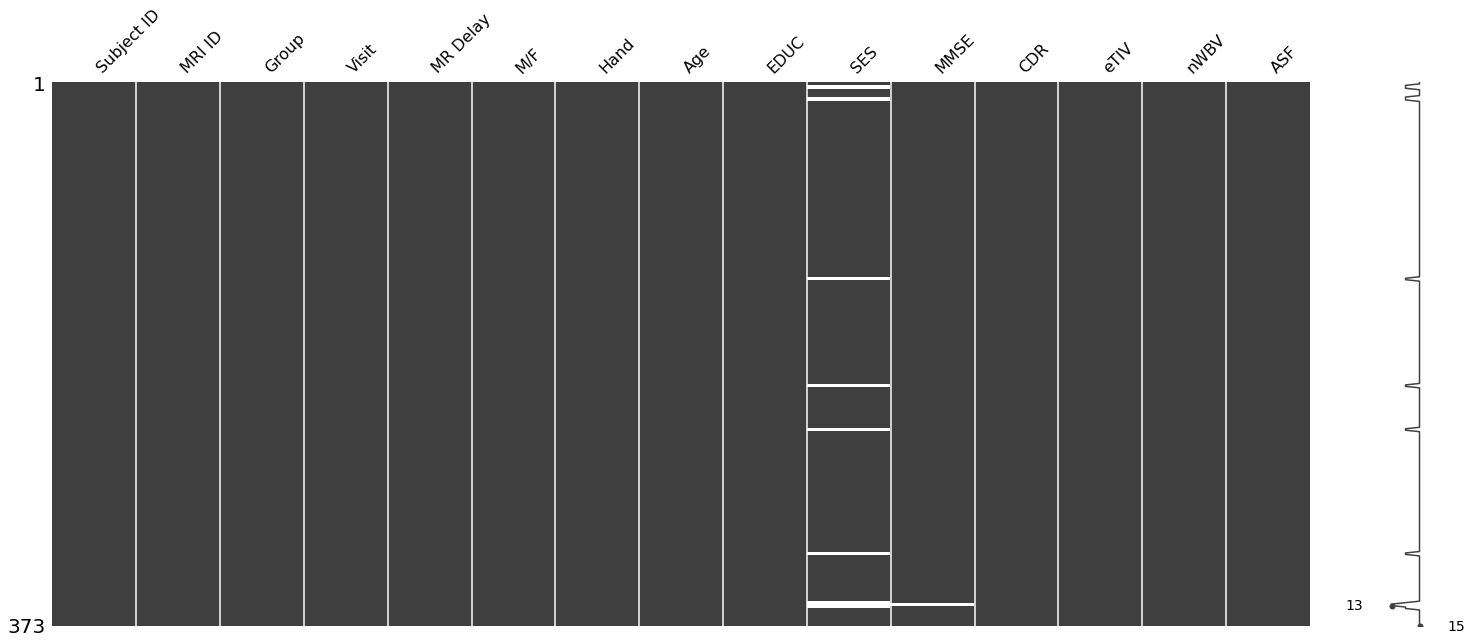

In [13]:
# Graficamos los datos u¿nulos y ubicamos en que coumna estan 
msno.matrix(dfad);

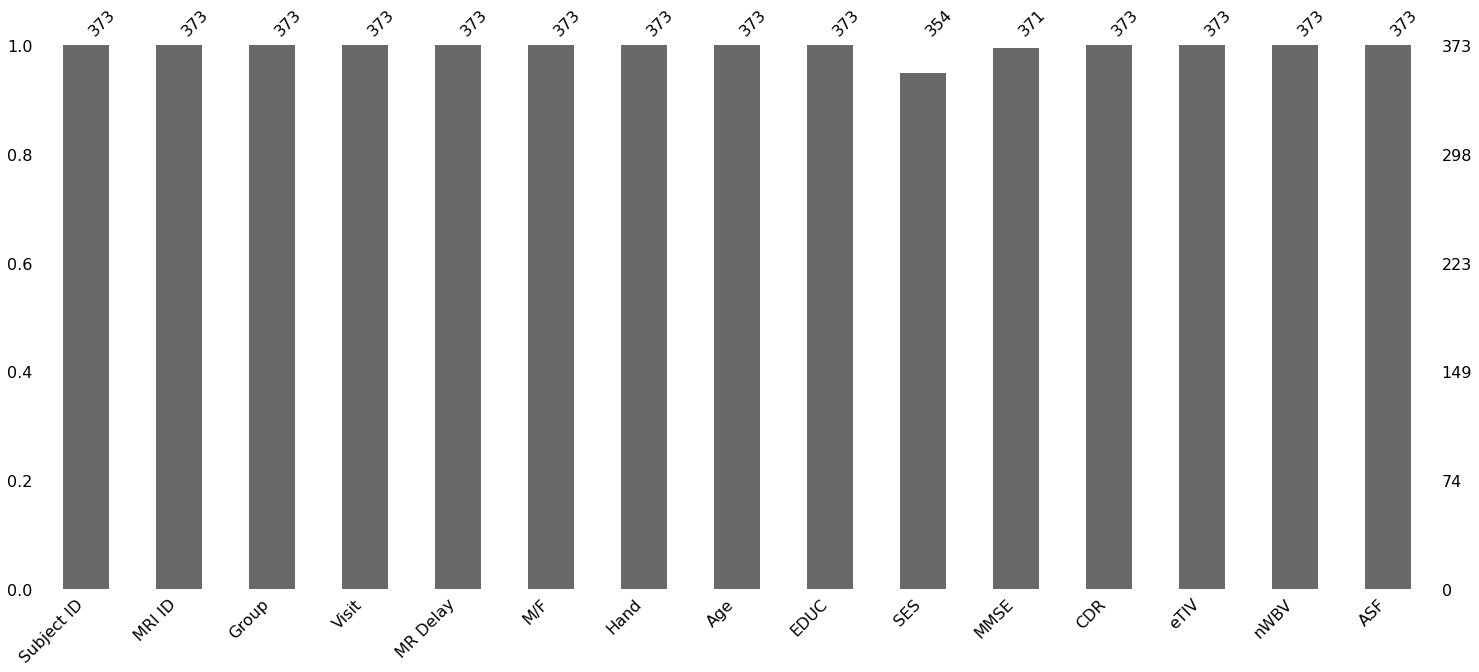

In [14]:
msno.bar(dfad);

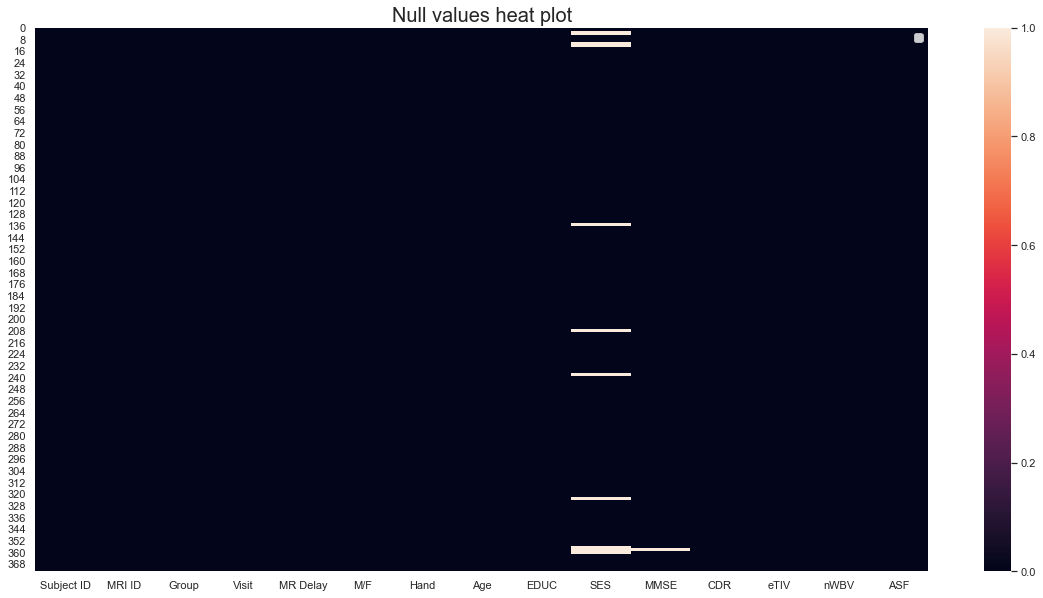

In [15]:
# Revisar los valores nulos con un heatmap
sns.set(rc={'figure.figsize':(20,10)}) # Tamaño de la imagen 
sns.set_style('whitegrid')
sns.heatmap(dfad.isnull())
plt.title('Null values heat plot',fontdict={'fontsize': 20})
plt.legend(dfad.isnull())
plt.show()

In [16]:
dfad.Group.value_counts()

Nondemented    190
Demented       146
Converted       37
Name: Group, dtype: int64

In [17]:
# Eliminamos datos nulos 
dfad.dropna(subset=["SES","MMSE"], inplace=True)
dfad.head(30)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033
13,OAS2_0008,OAS2_0008_MR1,Nondemented,1,0,F,R,93,14,2.0,30.0,0.0,1272,0.698,1.380
14,OAS2_0008,OAS2_0008_MR2,Nondemented,2,742,F,R,95,14,2.0,29.0,0.0,1257,0.703,1.396
15,OAS2_0009,OAS2_0009_MR1,Demented,1,0,M,R,68,12,2.0,27.0,0.5,1457,0.806,1.205


In [18]:
dfad.isnull(). sum ()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [19]:
dem = dfad[dfad["Group"]=="Demented"]
nond = dfad[dfad["Group"]=="Nondemented"]
conv = dfad[dfad["Group"]=="Converted"]

dem, nond, conv

(    Subject ID         MRI ID     Group  Visit  MR Delay M/F Hand  Age  EDUC  \
 15   OAS2_0009  OAS2_0009_MR1  Demented      1         0   M    R   68    12   
 16   OAS2_0009  OAS2_0009_MR2  Demented      2       576   M    R   69    12   
 17   OAS2_0010  OAS2_0010_MR1  Demented      1         0   F    R   66    12   
 18   OAS2_0010  OAS2_0010_MR2  Demented      2       854   F    R   68    12   
 25   OAS2_0014  OAS2_0014_MR1  Demented      1         0   M    R   76    16   
 ..         ...            ...       ...    ...       ...  ..  ...  ...   ...   
 365  OAS2_0184  OAS2_0184_MR1  Demented      1         0   F    R   72    16   
 366  OAS2_0184  OAS2_0184_MR2  Demented      2       553   F    R   73    16   
 367  OAS2_0185  OAS2_0185_MR1  Demented      1         0   M    R   80    16   
 368  OAS2_0185  OAS2_0185_MR2  Demented      2       842   M    R   82    16   
 369  OAS2_0185  OAS2_0185_MR3  Demented      3      2297   M    R   86    16   
 
      SES  MMSE  CDR  eTIV

In [48]:
dfad.head(30)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033
13,OAS2_0008,OAS2_0008_MR1,Nondemented,1,0,F,R,93,14,2.0,30.0,0.0,1272,0.698,1.380
14,OAS2_0008,OAS2_0008_MR2,Nondemented,2,742,F,R,95,14,2.0,29.0,0.0,1257,0.703,1.396
15,OAS2_0009,OAS2_0009_MR1,Demented,1,0,M,R,68,12,2.0,27.0,0.5,1457,0.806,1.205


In [21]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Scatter(x=dfad['Group'],
                                y=dfad['Age'],
                                mode='markers',
                                marker_color=dfad['Age'],
                               ))

fig.show()

In [22]:
df_1 = pd.DataFrame(dfad, columns=['Age',])
df_1.head()
df_1.iplot()

In [23]:
fig = go.Figure(data=go.Scatter(
    y = dfad['Age'],
    mode='markers',
    marker=dict(
        size=16,
        color=dfad['Age'],
        colorscale='Viridis', 
        showscale=True
    )
))

fig.show()

In [ ]:
# Para la paleta de colores https://python-charts.com/es/colores/

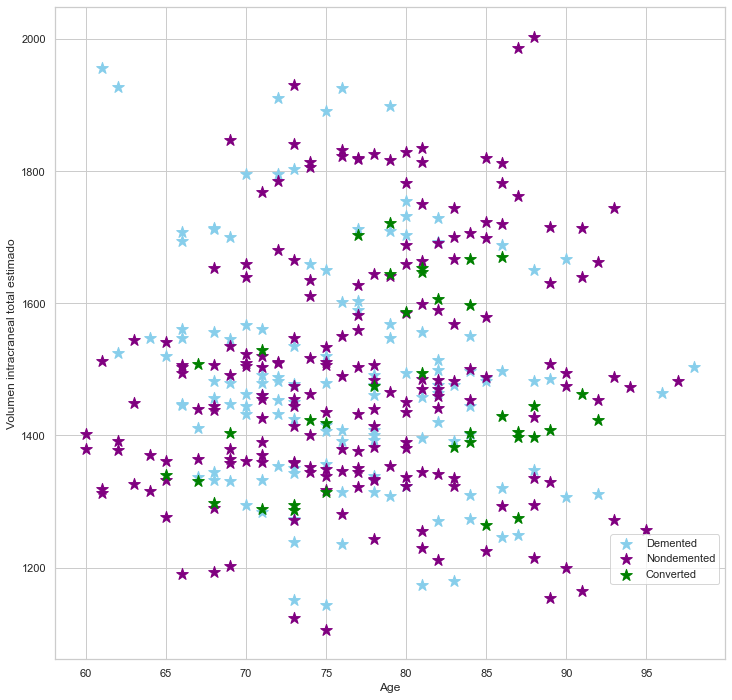

In [24]:
plt.figure(figsize=(12,12))
plt.scatter(dem["Age"], dem["eTIV"],
            marker="*", s=150, color="skyblue",
            label="Demented")

plt.scatter(nond["Age"], nond["eTIV"],
            marker="*", s=150, color="purple", 
            label="Nondemented")

plt.scatter(conv["Age"], conv["eTIV"],
            marker="*", s=150, color="green", 
            label="Converted")

plt.ylabel("Volumen intracraneal total estimado")
plt.xlabel("Age")
plt.legend(bbox_to_anchor=(1, 0.2)) 
plt.show()

In [25]:
Mujeres = dfad[dfad["M/F"]=="F"]
Hombres = dfad[dfad["M/F"]=="M"]

Mujeres, Hombres

(    Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
 5    OAS2_0004  OAS2_0004_MR1  Nondemented      1         0   F    R   88   
 6    OAS2_0004  OAS2_0004_MR2  Nondemented      2       538   F    R   90   
 13   OAS2_0008  OAS2_0008_MR1  Nondemented      1         0   F    R   93   
 14   OAS2_0008  OAS2_0008_MR2  Nondemented      2       742   F    R   95   
 17   OAS2_0010  OAS2_0010_MR1     Demented      1         0   F    R   66   
 ..         ...            ...          ...    ...       ...  ..  ...  ...   
 365  OAS2_0184  OAS2_0184_MR1     Demented      1         0   F    R   72   
 366  OAS2_0184  OAS2_0184_MR2     Demented      2       553   F    R   73   
 370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F    R   61   
 371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763   F    R   63   
 372  OAS2_0186  OAS2_0186_MR3  Nondemented      3      1608   F    R   65   
 
      EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF  
 5      18  3

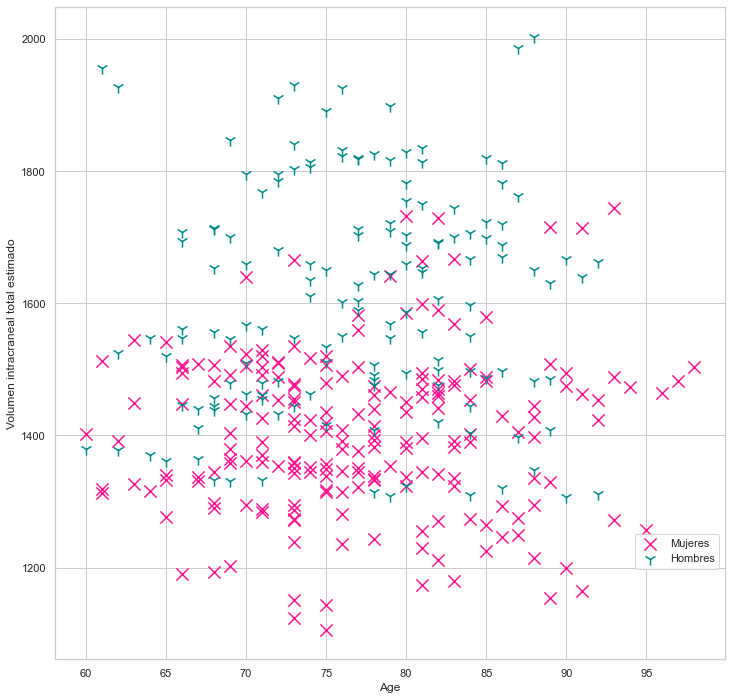

In [26]:
plt.figure(figsize=(12,12))
plt.scatter(Mujeres["Age"], Mujeres["eTIV"],
            marker="x", s=150, color="deeppink",
            label="Mujeres")

plt.scatter(Hombres["Age"], Hombres["eTIV"],
            marker="1", s=150, color="darkcyan", 
            label="Hombres")


plt.ylabel("Volumen intracraneal total estimado")
plt.xlabel("Age")
plt.legend(bbox_to_anchor=(1, 0.2)) 
plt.show()

El volumen total del contenido intracraneal es de aproximadamente 1500 cc 

In [28]:
dfad.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039


df = px.data.tips()
fig = px.scatter(df, x="total_bill", y="tip", color="smoker", facet_col="sex", facet_row="time")
fig.show()

In [39]:
dfad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  354 non-null    object 
 1   MRI ID      354 non-null    object 
 2   Group       354 non-null    object 
 3   Visit       354 non-null    int64  
 4   MR Delay    354 non-null    int64  
 5   M/F         354 non-null    object 
 6   Hand        354 non-null    object 
 7   Age         354 non-null    int64  
 8   EDUC        354 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        354 non-null    float64
 11  CDR         354 non-null    float64
 12  eTIV        354 non-null    int64  
 13  nWBV        354 non-null    float64
 14  ASF         354 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 44.2+ KB


In [40]:
descriptores = pd.DataFrame(Data_des)
descriptores.style.hide_index()

C:\Users\MiCachi\AppData\Local\Temp\ipykernel_14928\1644040447.py:2: FutureWarning:

this method is deprecated in favour of `Styler.hide(axis='index')`



Siglas,Significado
EDUC,Años de educación
SES,Estatus socioeconómico
MMSE,Mini examen de estado mental
CDR,Calificación clínica de demencia
eTIV,Volumen intracraneal total estimado
nWBV,Volumen total de cerebro normalizado
ASF,Factor de escala del atlas


In [41]:
Data_categorica = ["Subject ID", "MRI ID","Group","M/F","Hand",]
Data_numerica = ["Visit", "MR Delay", "Age", "EDUC", "SES", "MMSE", "CDR", "eTIV", "nWBV","ASF"]
Date_fisiologica = ["M/F","MR Delay","Age","eTIV","nWBV","ASF"]
Data_psico = ["MMSE","CDR"]

In [65]:
Data_numerica

['Visit',
 'MR Delay',
 'Age',
 'EDUC',
 'SES',
 'MMSE',
 'CDR',
 'eTIV',
 'nWBV',
 'ASF']

In [64]:
Data_categorica

['Subject ID', 'MRI ID', 'Group', 'M/F', 'Hand']

Cambiar data categorica a numerica para que este modelo sea viable 
https://www.youtube.com/watch?v=mMOBER643Do&t=1s 
lo vamos a hacer mapeando un diccionario 

In [46]:
dfad3 = dfad.loc[:,["Subject ID","Age","EDUC","SES","eTIV", "nWBV","ASF", "Group"]]
dfad3.head()

,Subject ID,Age,EDUC,SES,eTIV,nWBV,ASF,Group
0,OAS2_0001,87,14,2.0,1987,0.696,0.883,Nondemented
1,OAS2_0001,88,14,2.0,2004,0.681,0.876,Nondemented
5,OAS2_0004,88,18,3.0,1215,0.710,1.444,Nondemented
6,OAS2_0004,90,18,3.0,1200,0.718,1.462,Nondemented
7,OAS2_0005,80,12,4.0,1689,0.712,1.039,Nondemented


In [49]:
Groups = {"Nondemented":0, "Demented":1, "Converted":2}

In [51]:
dfad3["Group"] = dfad3["Group"].map(Groups)

In [52]:
dfad3

,Subject ID,Age,EDUC,SES,eTIV,nWBV,ASF,Group
0,OAS2_0001,87,14,2.0,1987,0.696,0.883,0
1,OAS2_0001,88,14,2.0,2004,0.681,0.876,0
5,OAS2_0004,88,18,3.0,1215,0.710,1.444,0
6,OAS2_0004,90,18,3.0,1200,0.718,1.462,0
7,OAS2_0005,80,12,4.0,1689,0.712,1.039,0
...,...,...,...,...,...,...,...,...
368,OAS2_0185,82,16,1.0,1693,0.694,1.037,1
369,OAS2_0185,86,16,1.0,1688,0.675,1.040,1
370,OAS2_0186,61,13,2.0,1319,0.801,1.331,0
371,OAS2_0186,63,13,2.0,1327,0.796,1.323,0


K-Vecinos Más Cercanos (KNN) 

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [53]:
dfad3

,Subject ID,Age,EDUC,SES,eTIV,nWBV,ASF,Group
0,OAS2_0001,87,14,2.0,1987,0.696,0.883,0
1,OAS2_0001,88,14,2.0,2004,0.681,0.876,0
5,OAS2_0004,88,18,3.0,1215,0.710,1.444,0
6,OAS2_0004,90,18,3.0,1200,0.718,1.462,0
7,OAS2_0005,80,12,4.0,1689,0.712,1.039,0
...,...,...,...,...,...,...,...,...
368,OAS2_0185,82,16,1.0,1693,0.694,1.037,1
369,OAS2_0185,86,16,1.0,1688,0.675,1.040,1
370,OAS2_0186,61,13,2.0,1319,0.801,1.331,0
371,OAS2_0186,63,13,2.0,1327,0.796,1.323,0


In [65]:
mal = dfad3[dfad3["Group"]==1]
bien = dfad3[dfad3["Group"]== 0]
incierto = dfad3[dfad3["Group"]== 2]
mal, bien, incierto

(    Subject ID  Age  EDUC  SES  eTIV   nWBV    ASF  Group
 15   OAS2_0009   68    12  2.0  1457  0.806  1.205      1
 16   OAS2_0009   69    12  2.0  1480  0.791  1.186      1
 17   OAS2_0010   66    12  3.0  1447  0.769  1.213      1
 18   OAS2_0010   68    12  3.0  1482  0.752  1.184      1
 25   OAS2_0014   76    16  3.0  1602  0.697  1.096      1
 ..         ...  ...   ...  ...   ...    ...    ...    ...
 365  OAS2_0184   72    16  3.0  1354  0.733  1.296      1
 366  OAS2_0184   73    16  3.0  1351  0.708  1.299      1
 367  OAS2_0185   80    16  1.0  1704  0.711  1.030      1
 368  OAS2_0185   82    16  1.0  1693  0.694  1.037      1
 369  OAS2_0185   86    16  1.0  1688  0.675  1.040      1
 
 [127 rows x 8 columns],
     Subject ID  Age  EDUC  SES  eTIV   nWBV    ASF  Group
 0    OAS2_0001   87    14  2.0  1987  0.696  0.883      0
 1    OAS2_0001   88    14  2.0  2004  0.681  0.876      0
 5    OAS2_0004   88    18  3.0  1215  0.710  1.444      0
 6    OAS2_0004   90    18  3

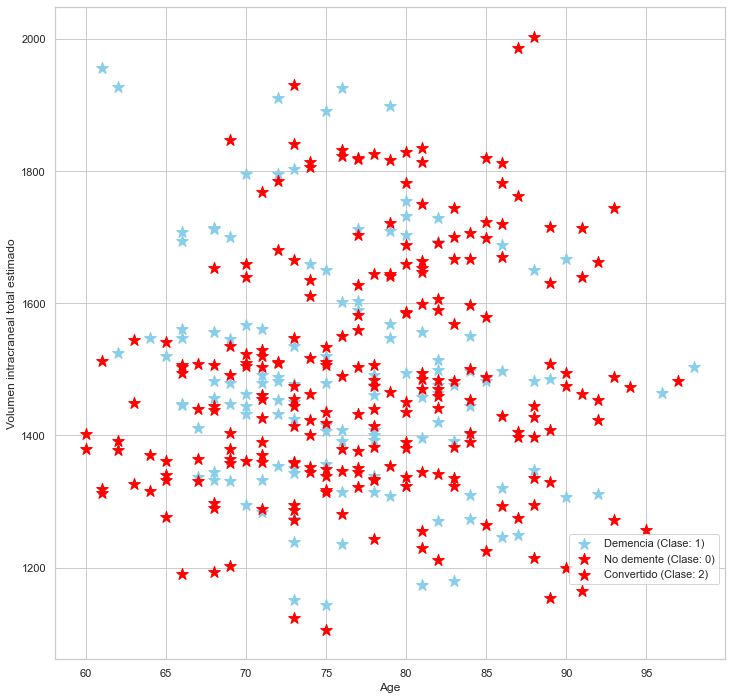

In [67]:
plt.figure(figsize=(12,12))
plt.scatter(mal["Age"], mal["eTIV"],
            marker="*", s=150, color="skyblue",
            label="Demencia (Clase: 1)")

plt.scatter(bien["Age"], bien["eTIV"],
            marker="*", s=150, color="red", 
            label="No demente (Clase: 0)")

plt.scatter(incierto["Age"], incierto["eTIV"],
            marker="*", s=150, color="red", 
            label="Convertido (Clase: 2)")

plt.ylabel("Volumen intracraneal total estimado")
plt.xlabel("Age")
plt.legend(bbox_to_anchor=(1, 0.2)) 
plt.show()

In [68]:
data = dfad3[["Age", "eTIV"]]
clase = dfad3["Group"]

escalador = preprocessing.MinMaxScaler()
# los numeros mas pequeños lo shace ceros y los mas grandes uno 
# para que quede un rango de cero a uno
data = escalador.fit_transform(data)
data

array([[0.71052632, 0.98106904],
       [0.73684211, 1.        ],
       [0.73684211, 0.12138085],
       [0.78947368, 0.10467706],
       [0.52631579, 0.64922049],
       [0.60526316, 0.66258352],
       [0.65789474, 0.66035635],
       [0.86842105, 0.18485523],
       [0.92105263, 0.16815145],
       [0.21052632, 0.3908686 ],
       [0.23684211, 0.41648107],
       [0.15789474, 0.37973274],
       [0.21052632, 0.41870824],
       [0.47368421, 0.25278396],
       [0.52631579, 0.24164811],
       [0.60526316, 0.24164811],
       [0.55263158, 0.13808463],
       [0.57894737, 0.11804009],
       [0.65789474, 0.1325167 ],
       [0.42105263, 0.55233853],
       [0.44736842, 0.5389755 ],
       [0.73684211, 0.60690423],
       [0.78947368, 0.62583519],
       [0.52631579, 0.75389755],
       [0.55263158, 0.78841871],
       [0.65789474, 0.79510022],
       [0.68421053, 0.78730512],
       [0.71052632, 0.33407572],
       [0.73684211, 0.32516704],
       [0.84210526, 0.35300668],
       [0.

Creación del Modelo KNN
Valor de K

In [69]:
n_neighbors = 354**(1/2)
print (n_neighbors)

18.81488772222678


In [62]:
clasificador = KNeighborsClassifier(n_neighbors=18)
# numero de vecinos esta definido a priori 
# un metodo utilizado es usar la raiz cuadrada del numero de instancias 
# con las que se esta creando el modelo, es decir, el numero de N
clasificador.fit(data, clase)

KNeighborsClassifier(n_neighbors=18)

Clase: [0]
Probabilidades por clase [[0.61111111 0.38888889 0.        ]]


C:\Users\MiCachi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



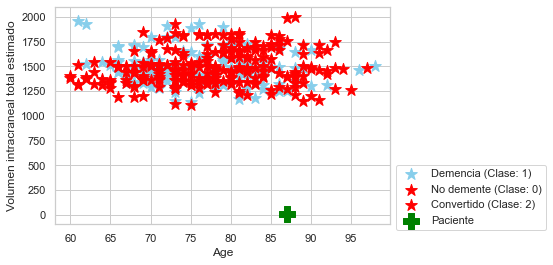

In [70]:
Age = 87
eTIV = 0.883

#Escalar los datos del nuevo solicitante
paciente = escalador.transform([[Age, eTIV]])

#Calcular clase y probabilidades
print("Clase:", clasificador.predict(paciente))
print("Probabilidades por clase",
      clasificador.predict_proba(paciente))

#Código para graficar
plt.scatter(mal["Age"], mal["eTIV"],
            marker="*", s=150, color="skyblue", label="Demencia (Clase: 1)")

plt.scatter(bien["Age"], bien["eTIV"],
            marker="*", s=150, color="red", label="No demente (Clase: 0)")

plt.scatter(incierto["Age"], incierto["eTIV"],
            marker="*", s=150, color="red",  label="Convertido (Clase: 2)")

plt.scatter(Age, eTIV, marker="P", s=250, color="green", label="Paciente") 
plt.ylabel("Volumen intracraneal total estimado")
plt.xlabel("Age")
plt.legend(bbox_to_anchor=(1, 0.3))
plt.show()